In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/sample_data/brain.zip


Archive:  /content/sample_data/brain.zip
  inflating: brain_tumor_dataset/Tumor/Y1.jpg  
  inflating: brain_tumor_dataset/Tumor/Y10.jpg  
  inflating: brain_tumor_dataset/Tumor/Y100.JPG  
  inflating: brain_tumor_dataset/Tumor/Y101.jpg  
  inflating: brain_tumor_dataset/Tumor/Y102.jpg  
  inflating: brain_tumor_dataset/Tumor/Y103.jpg  
  inflating: brain_tumor_dataset/Tumor/Y104.jpg  
  inflating: brain_tumor_dataset/Tumor/Y105.jpg  
  inflating: brain_tumor_dataset/Tumor/Y106.jpg  
  inflating: brain_tumor_dataset/Tumor/Y107.jpg  
  inflating: brain_tumor_dataset/Tumor/Y108.jpg  
  inflating: brain_tumor_dataset/Tumor/Y109.JPG  
  inflating: brain_tumor_dataset/Tumor/Y11.jpg  
  inflating: brain_tumor_dataset/Tumor/Y111.JPG  
  inflating: brain_tumor_dataset/Tumor/Y112.JPG  
  inflating: brain_tumor_dataset/Tumor/Y113.JPG  
  inflating: brain_tumor_dataset/Tumor/Y114.JPG  
  inflating: brain_tumor_dataset/Tumor/Y115.JPG  
  inflating: brain_tumor_dataset/Tumor/Y116.JPG  
  inflating: 

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import os
import math
import shutil
import glob

In [ ]:
#count the num of images in classes 1  - brain tumor
#0 = healthy
ROOT_DIR = "/content/brain_tumor_dataset"
number_of_imgs = {}
for dir in os.listdir(ROOT_DIR):
  number_of_imgs[dir] = len(os.listdir(os.path.join(ROOT_DIR,dir)) )

In [ ]:
number_of_imgs.items()

dict_items([('healthy', 98), ('Tumor', 155)])

In [ ]:
len(os.listdir("/content/brain_tumor_dataset"))

2

In [ ]:


def data_Folder(p, split):
    # Create the main directory if it does not exist
    if not os.path.exists("./" + p):
        os.mkdir("./" + p)

        for dir in os.listdir(ROOT_DIR):
            # Create subdirectories inside the main directory
            os.makedirs(os.path.join("./" + p, dir))

            # Get the list of images in the directory
            img_list = os.listdir(os.path.join(ROOT_DIR, dir))
            num_imgs = len(img_list)

            # Calculate the number of images to move, ensuring it does not exceed available images
            num_to_move = min(math.floor(split * num_imgs) - 2, num_imgs)

            # Randomly select images to move
            images_to_move = np.random.choice(a=img_list, size=num_to_move, replace=False)
            for img in images_to_move:
                O = os.path.join(ROOT_DIR, dir, img)
                D = os.path.join("./" + p, dir, img)
                shutil.move(O, D)  # Use shutil.move to move the file instead of os.remove

    else:
        print(f"{p} folder already exists.")


In [ ]:
data_Folder("train",0.7)

In [ ]:
data_Folder("val",0.15)

In [ ]:
data_Folder("test",0.15)

In [ ]:
number_of_imgs = {}
for dir in os.listdir(ROOT_DIR):
  number_of_imgs[dir] = len(os.listdir(os.path.join(ROOT_DIR,dir)) )
number_of_imgs.items()

dict_items([('healthy', 28), ('Tumor', 40)])

In [ ]:
! pip install keras
!pip install tensorflow



In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


In [ ]:
#CNN model
model = Sequential()
model.add(Conv2D(filters = 16,kernel_size =(3,3),activation='relu', input_shape=(224,224,3) ))
model.add(Conv2D(filters=36, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(rate = 0.25))
model.add(Flatten())
model.add(Dense(units=64,activation = 'relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(units=1,activation='sigmoid'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 36)        │           5,220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 36)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 64)        │          20,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       5,537,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,638,245 (21.51 MB)

 Trainable params: 5,638,245 (21.51 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer="adam",loss =keras.losses.categorical_crossentropy,metrics=["accuracy"])

In [ ]:
def preprocessingImages(path):
  image_data = ImageDataGenerator(zoom_range =0.2,shear_range = 0.2,rescale = 1/255,horizontal_flip = True )
  image = image_data.flow_from_directory(directory = path,target_size =(224,224),batch_size = 32,class_mode = "binary")
  return image

In [ ]:
train_data = preprocessingImages("/content/train")

Found 172 images belonging to 2 classes.


In [ ]:
def preprocessingImages2(path):
  image_data = ImageDataGenerator(rescale = 1/255)
  image = image_data.flow_from_directory(directory = path,target_size =(224,224),batch_size = 32,class_mode = "binary")
  return image

In [ ]:
test_data =  preprocessingImages2("/content/test")

Found 6 images belonging to 2 classes.


In [ ]:
val_data =  preprocessingImages2("/content/val")

Found 7 images belonging to 2 classes.


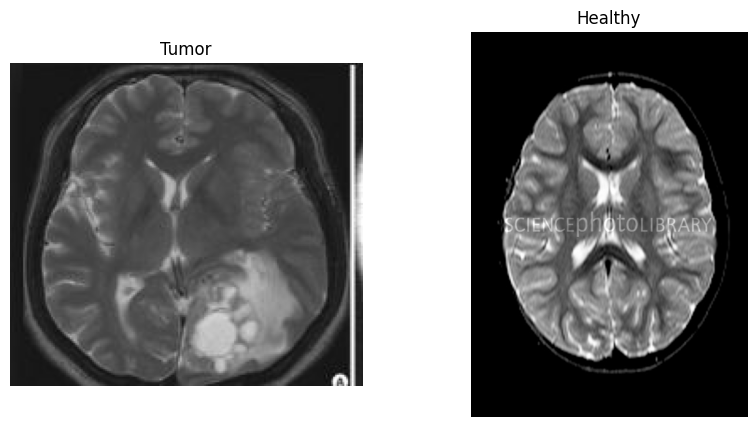

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the images directly from the file
img_path1 = "/content/train/Tumor/Y184.JPG"  # Replace with your image path
img_path2 = "/content/train/healthy/46 no.jpg"  # Replace with your image path

image1 = Image.open(img_path1)
image2 = Image.open(img_path2)

# Create subplots to display images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the first image
axes[0].imshow(image1)
axes[0].axis('off')  # Turn off axis for the first image
axes[0].set_title('Tumor')  # Set title for the first image

# Display the second image
axes[1].imshow(image2)
axes[1].axis('off')  # Turn off axis for the second image
axes[1].set_title('Healthy')  # Set title for the second image

# Show the plot
plt.show()


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define EarlyStopping callback
es = EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience=6, verbose=1, mode="auto")

# Define ModelCheckpoint callback with .keras extension
mc = ModelCheckpoint(monitor="val_accuracy", filepath="./bestmodel.keras", verbose=1, save_best_only=True, mode="auto")

# Combine callbacks into a list
cd = [es, mc]


In [ ]:
hs = model.fit(
    x=train_data,  # Training data generator
    steps_per_epoch=8,  # Number of steps per epoch
    epochs=30,  # Number of epochs to train
    verbose=1,  # Verbosity mode
    validation_data=val_data,  # Validation data generator
    validation_steps=16,  # Number of validation steps
    callbacks=cd  # List of callbacks
)


Epoch 1/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 9s 5s/step - accuracy: 0.6087 - loss: 0.0000e+00 
Epoch 1: val_accuracy improved from -inf to 0.71429, saving model to ./bestmodel.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.6106 - loss: 0.0000e+00 - val_accuracy: 0.7143 - val_loss: 0.0000e+00
Epoch 2/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 9s 5s/step - accuracy: 0.6238 - loss: 0.0000e+00 
Epoch 2: val_accuracy did not improve from 0.71429
8/8 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.6219 - loss: 0.0000e+00 - val_accuracy: 0.7143 - val_loss: 0.0000e+00
Epoch 3/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 9s 5s/step - accuracy: 0.5974 - loss: 0.0000e+00 
Epoch 3: val_accuracy did not improve from 0.71429
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.6021 - loss: 0.0000e+00 - val_accuracy: 0.7143 - val_loss: 0.0000e+00
Epoch 4/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 8s 4s/step - accuracy: 0.6246 - loss: 0.0000e+00 
Epoch 4: val_accuracy did not improve from 0.71429
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.62

In [ ]:
h = hs.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

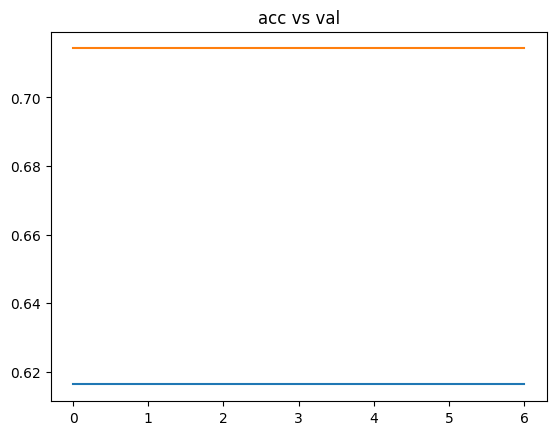

In [ ]:
plt.plot(h["accuracy"])
plt.plot(h["val_accuracy"])
plt.title("acc vs val")
plt.show()

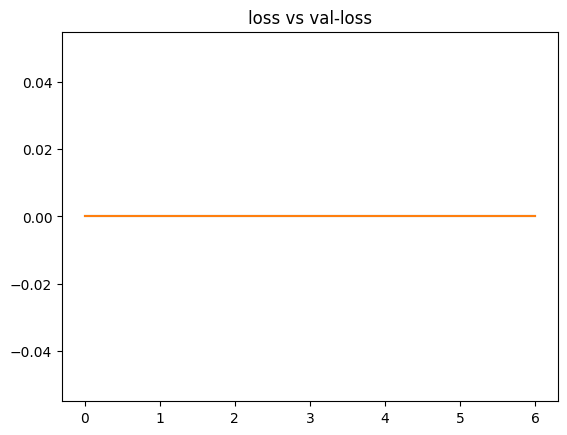

In [ ]:
plt.plot(h["loss"])
plt.plot(h["val_loss"])
plt.title("loss vs val-loss")
plt.show()

In [ ]:
from keras.models import load_model

# Load the model
model = load_model("/content/bestmodel.keras")


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(test_data)

# Print the accuracy
print(f"Accuracy of model is {accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step - accuracy: 0.6667 - loss: 0.0000e+00
Accuracy of model is 66.67%


In [ ]:
from keras.preprocessing.image import load_img, img_to_array


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Enter the path to the MRI image: /content/brain_tumor_dataset/Tumor/Y161.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
This Brain MRI is having Cancer


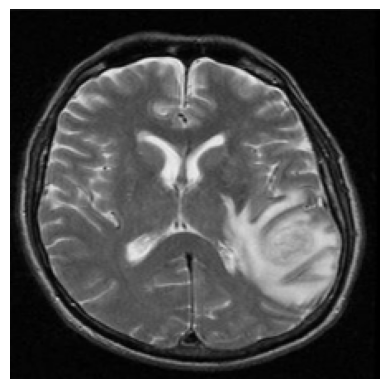

In [ ]:
path = "/content/brain_tumor_dataset/Tumor/Y195.JPG"
img = load_img(path,target_size =(224,224))
input_arr = img_to_array(img)/255
input_arr.shape
input_arr = np.expand_dims(input_arr,axis =0)
# Predict probabilities for each class
predictions = model.predict(input_arr)

# For binary classification, you can use a threshold to determine the class
# Assuming a threshold of 0.5 for binary classification
pred = (predictions > 0.5).astype(int)

# If you are doing multi-class classification, you might need to use argmax
# pred = np.argmax(predictions, axis=1)

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Get the image path from the user
img_path = input("Enter the path to the MRI image: ")

# Load and preprocess the image
# Ensure the image path is valid and file exists
try:
    # Load the image for prediction
    image = Image.open(img_path)
    image = image.resize((224, 224))  # Resize to match model input size
    image_array = img_to_array(image)
    input_arr = np.expand_dims(image_array, axis=0) / 255.0  # Normalize if needed

    # Predict the class
    predictions = model.predict(input_arr)
    pred = (predictions > 0.5).astype(int)

    if pred[0][0] == 0:
        print("This Brain MRI is having Cancer")

        # Display the image
        plt.imshow(image)
        plt.axis('off')  # Hide axis
        plt.show()
    else:
        print("No cancer found")

except FileNotFoundError:
    print("The file path provided does not exist. Please check the path and try again.")
except Exception as e:
    print(f"An error occurred: {e}")



In [ ]:
train_data.class_indices